In [127]:
import pandas as pd
import seaborn as sns
from sklearn import manifold
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [128]:
sns.set_context('talk')

In [3]:
df = pd.read_table("nmds_transect_R.csv", sep=',', index_col=0, header=None, names=['x','y'])

In [4]:
metadata_df = pd.read_table("../tables/baltic_transect_2014/metadata.tsv")
metadata_df['Salinity'] = metadata_df['Salinity'].apply(lambda x: float(x.replace(',','.')))
metadata_df['Sampling depth'] = metadata_df['Sampling depth'].apply(lambda x: float(x.replace(',','.')))
metadata_df.index = metadata_df['Comment']

In [5]:
salinity = list(metadata_df.sort_values('Comment')['Salinity'].values/40)

In [6]:
depth = list(np.log(metadata_df.sort_values('Comment')['Sampling depth'].values)*50)

In [7]:
Blues = plt.get_cmap('Blues')

(-0.3, 0.4)

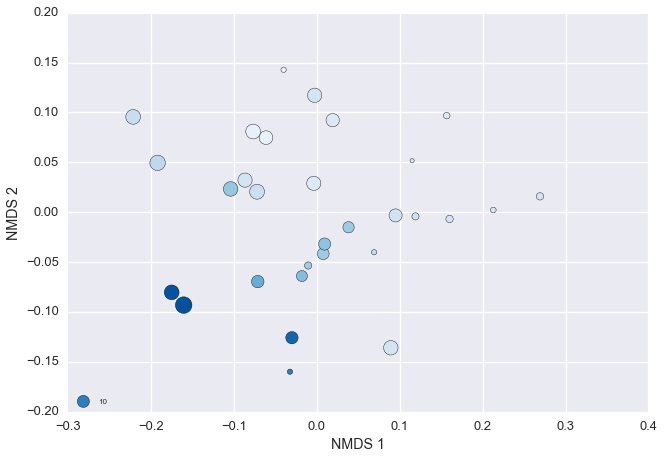

In [27]:
ax = df.plot.scatter(x='x',y='y', c=Blues(salinity), s=depth)
ax.set_xlabel('NMDS 1')
ax.set_ylabel('NMDS 2')
sm = plt.cm.ScalarMappable(cmap=Blues, norm=plt.Normalize(vmin=0, vmax=1))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
#cb = plt.colorbar(sm)

#cb.ax.set_yticklabels([str(x*4) for x in range(10)])
#cb.ax.set_title("Salinity")
plt.legend(
       ('10', '20', '300'),
       scatterpoints=1,
       loc='lower left',
       ncol=1,
       fontsize=8)


#plt.savefig("sample_scatter_R_nmds.pdf")

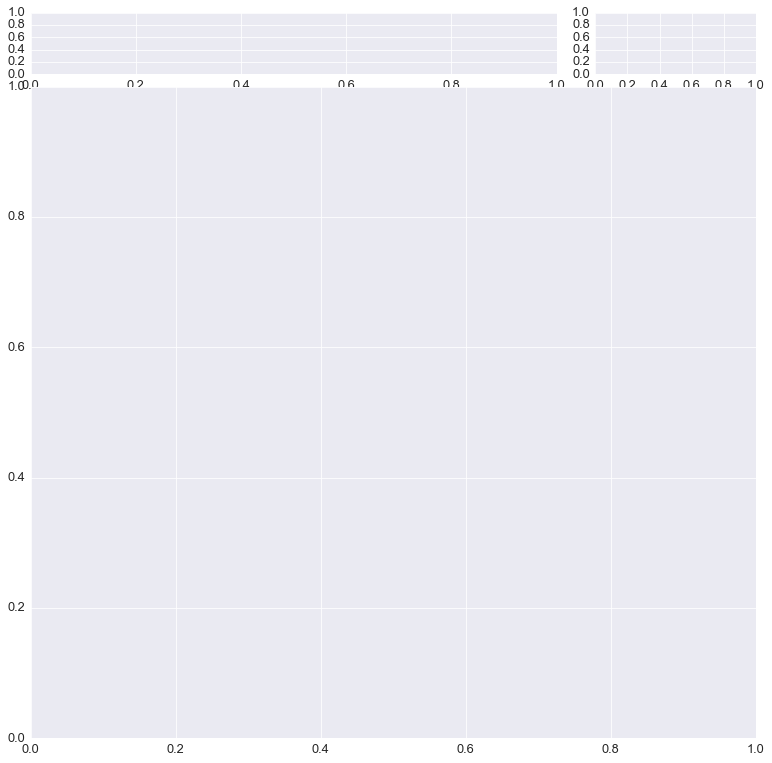

In [48]:
sns.set_context('paper', font_scale=1.6)
matplotlib.rcParams['figure.figsize'] = (13,13)

top_ax1 = plt.subplot2grid((10,22), (0, 0), colspan=16)
top_ax3 = plt.subplot2grid((10,22), (0, 17), colspan=6)

ax1 = plt.subplot2grid((10,22), (1, 0), rowspan=10, colspan=22)


In [52]:
plt.colorbar?

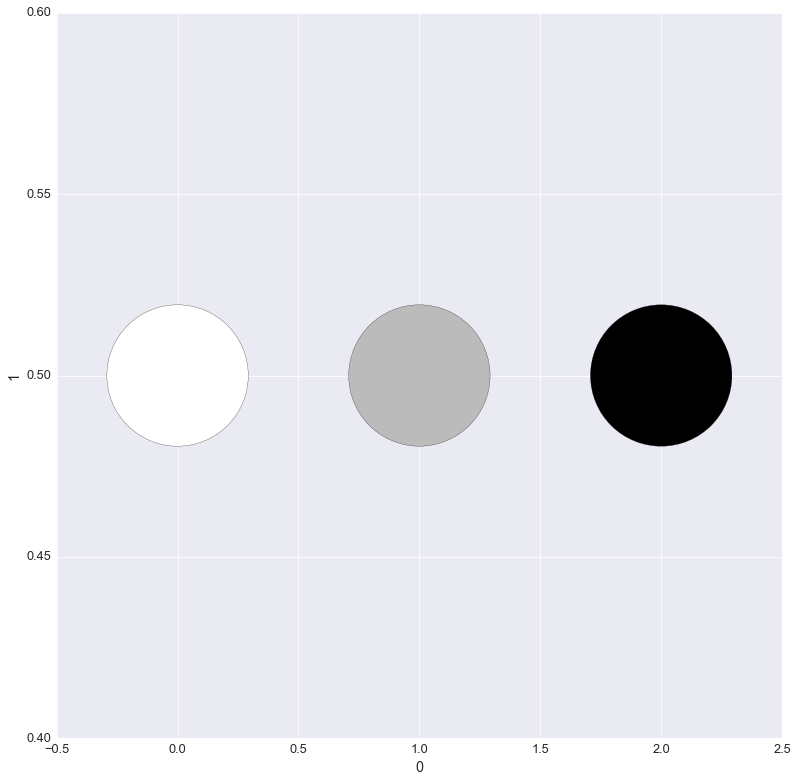

In [74]:
fake_df = pd.DataFrame(np.array([[0,0.5], [1,0.5], [2, 0.5]]))
fake_df.plot.scatter(x=0,y=1, s=20000)

In [104]:
plt.colorbar?

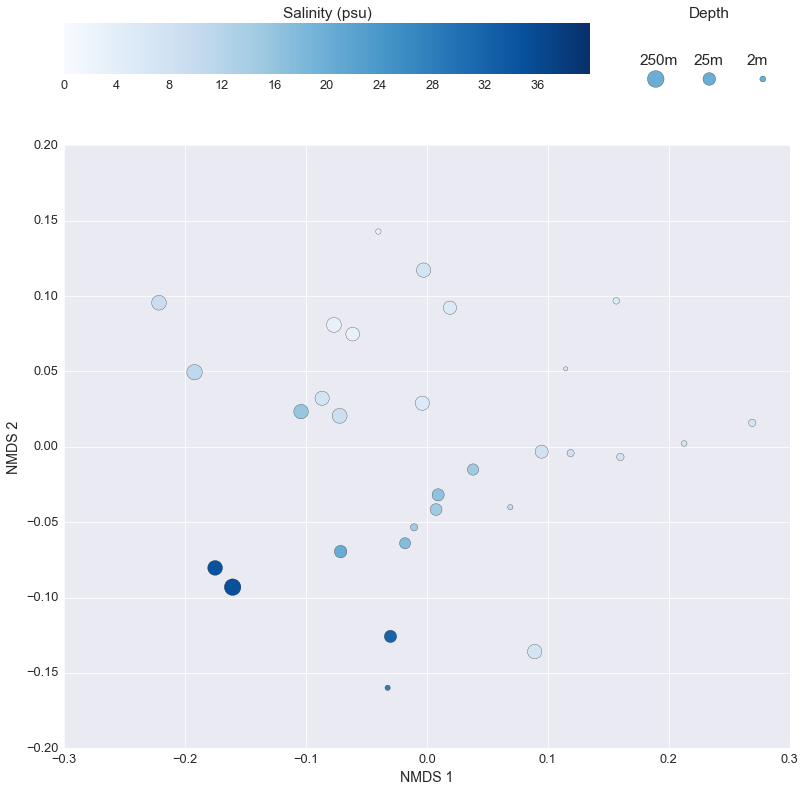

In [138]:
sns.set_context('paper', font_scale=1.6)
matplotlib.rcParams['figure.figsize'] = (13,13)

top_ax1 = plt.subplot2grid((12,22), (0, 0), colspan=16)
top_ax = plt.subplot2grid((12,22), (0, 17), rowspan=2, colspan=6)

ax1 = plt.subplot2grid((12,22), (2, 0), rowspan=10, colspan=22)

ax = df.plot.scatter(x='x',y='y', c=Blues(salinity), s=depth, ax=ax1)
ax.set_xlabel('NMDS 1')
ax.set_ylabel('NMDS 2')
sm = plt.cm.ScalarMappable(cmap=Blues, norm=plt.Normalize(vmin=0, vmax=1))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
cb = plt.colorbar(sm, cax=top_ax1, orientation='horizontal')
cb.ax.shrink=0.1

cb.ax.set_xticklabels([str(x*4) for x in range(10)])
#cb.ax.set_title("Salinity")
top_ax1.set_title('Salinity (psu)')


x=[0,1,2]
y=[0.5, 0.5, 0.5]

legend_real_s = [250.0, 25.0, 2.0]
legend_annot = ["250m", "25m", "2m"]
legend_s = [np.log(n)*50.0 for n in legend_real_s]

top_ax.scatter(x, y, s=legend_s, c=Blues(0.5))
for i, txt in enumerate(legend_annot):
    top_ax.annotate(txt, (x[i]-0.3,y[i]+0.02))

top_ax.spines['top'].set_visible(False)
top_ax.spines['right'].set_visible(False)
top_ax.spines['bottom'].set_visible(False)
top_ax.spines['left'].set_visible(False)
top_ax.xaxis.grid(False)
top_ax.yaxis.grid(False)
top_ax.set_yticks([])
top_ax.set_xticks([])

top_ax.set_axis_bgcolor('white')
top_ax.set_title('Depth')
plt.savefig("sample_scatter_R_nmds.pdf")